# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [152]:
'17 campaigns'

'17 campaigns'

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [155]:
import pandas as pd

In [157]:
df = pd.read_csv('/Users/arishdhingra/Desktop/module17_starter/data/bank-additional-full.csv', sep = ';')

In [158]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [162]:
# Check for missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [164]:
# Check how many "unknown" values exist in each column
df.apply(lambda col: (col == 'unknown').sum())

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [166]:
#Treat unknowns as a separate category
for col in ['job', 'marital', 'education', 'housing', 'loan']:
    df[col] = df[col].astype('category')

In [168]:
#Drop default column since alot of values are unknown and duration is something that will come after the result is .
df.drop(columns=['default'], inplace=True)
df.drop(columns=['duration'], inplace=True)

In [170]:
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


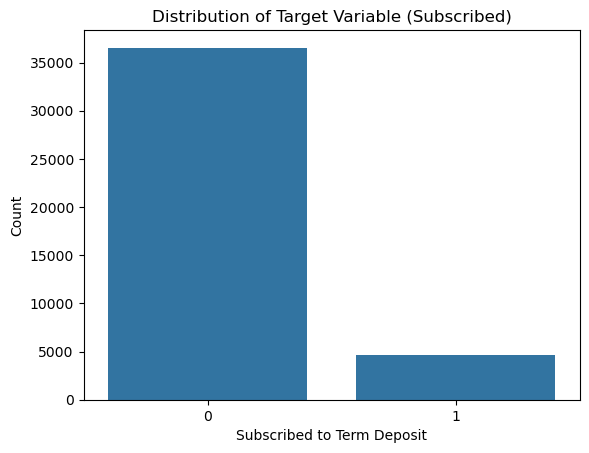

In [240]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='y', data=df)
plt.title("Distribution of Target Variable (Subscribed)")
plt.xlabel("Subscribed to Term Deposit")
plt.ylabel("Count")
plt.show()

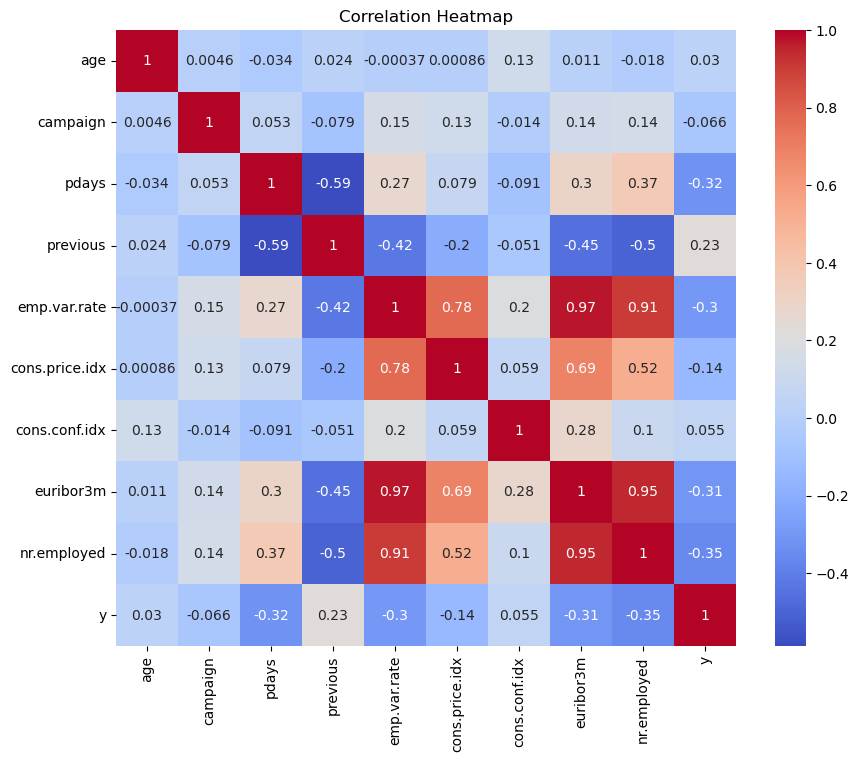

In [242]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

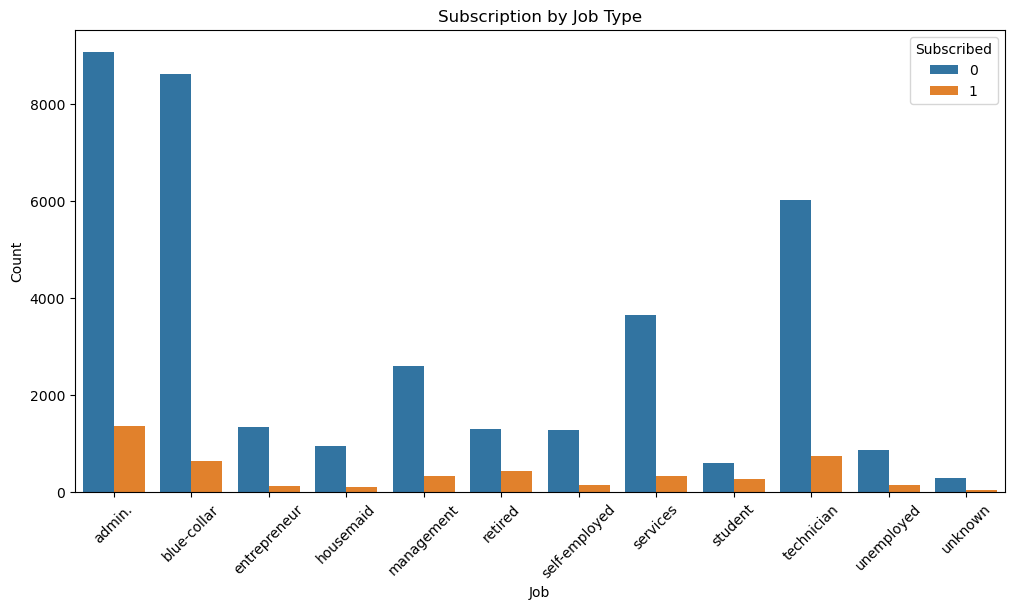

In [244]:
plt.figure(figsize=(12,6))
sns.countplot(x='job', hue='y', data=df)
plt.title("Subscription by Job Type")
plt.xticks(rotation=45)
plt.xlabel("Job")
plt.ylabel("Count")
plt.legend(title="Subscribed")
plt.show()

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   housing         41188 non-null  category
 5   loan            41188 non-null  category
 6   contact         41188 non-null  object  
 7   month           41188 non-null  object  
 8   day_of_week     41188 non-null  object  
 9   campaign        41188 non-null  int64   
 10  pdays           41188 non-null  int64   
 11  previous        41188 non-null  int64   
 12  poutcome        41188 non-null  object  
 13  emp.var.rate    41188 non-null  float64 
 14  cons.price.idx  41188 non-null  float64 
 15  cons.conf.idx   41188 non-null  float64 
 16  euribor3m       41188 non-null  float64 
 17  nr.employed 

In [175]:
'The objective of this task is to develop a predictive model that can help a Portuguese banking institution identify whether a client is likely to subscribe to a term deposit, based on their personal, contact, and socio-economic information. By accurately predicting client responses, the bank can optimize its telemarketing campaigns, reduce operational costs, and improve conversion rates by targeting only the most promising leads.'

'The objective of this task is to develop a predictive model that can help a Portuguese banking institution identify whether a client is likely to subscribe to a term deposit, based on their personal, contact, and socio-economic information. By accurately predicting client responses, the bank can optimize its telemarketing campaigns, reduce operational costs, and improve conversion rates by targeting only the most promising leads.'

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [178]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Step 1: Select features
bank_features = ['age', 'job', 'marital', 'education', 'housing', 'loan']
X = df[bank_features]

# Step 2: One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)  # drop_first to avoid multicollinearity

In [180]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [182]:
df['y'] = df['y'].str.strip().map({'yes': 1, 'no': 0})

In [184]:
y=df['y']

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)
X_train.head()

,age,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,housing_unknown,housing_yes,loan_unknown,loan_yes
39075,29,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
34855,29,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
7107,45,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
31614,34,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
34878,32,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [190]:
# Check class distribution
df['y'].value_counts(normalize=True)

y
0    0.887346
1    0.112654
Name: proportion, dtype: float64

In [192]:
'The baseline performance is determined by always predicting the majority class, which in this case is “no” (y = 0). Since 88.73% of the clients in the dataset did not subscribe to a term deposit, the baseline accuracy is approximately 88.7%. Any machine learning model must outperform this benchmark to be considered useful.'

'The baseline performance is determined by always predicting the majority class, which in this case is “no” (y = 0). Since 88.73% of the clients in the dataset did not subscribe to a term deposit, the baseline accuracy is approximately 88.7%. Any machine learning model must outperform this benchmark to be considered useful.'

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [208]:
from sklearn.linear_model import LogisticRegression

# Initialize and train logistic regression.
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

### Problem 9: Score the Model

What is the accuracy of your model?

In [213]:
# Evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8875940762320952


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [217]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import time

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC()
}

# Prepare result storage
results = []

# Train and evaluate each model
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    fit_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": round(accuracy, 4),
        "Fit Time (s)": round(fit_time, 4)
    })

# Create results DataFrame
results_df = pd.DataFrame(results)
results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

,Model,Accuracy,Fit Time (s)
0,Logistic Regression,0.8876,0.4609
1,Support Vector Machine,0.8876,3.9925
2,K-Nearest Neighbors,0.8755,0.0031
3,Decision Tree,0.8686,0.0482


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [234]:
'Handle pdays - We could have created a new binary feature: was_contacted_before = (pdays != 999). Binning age into age groups - We should have converted the age column in groups. I think the overall selection was fair for the features.'

'Handle pdays - We could have created a new binary feature: was_contacted_before = (pdays != 999). Binning age into age groups - We should have converted the age column in groups. I think the overall selection was fair for the features.'

In [224]:
#Hyperparameter Tuning (Grid Search)
#KNN

from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(3, 20)}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_knn.fit(X_train, y_train)

print("Best K:", grid_knn.best_params_)
print("Best Score:", grid_knn.best_score_)

Best K: {'n_neighbors': 18}
Best Score: 0.886025541160457


In [225]:
#Decision Tree

param_grid_dt = {
    'max_depth': [3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10]
}
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)
grid_dt.fit(X_train, y_train)

print("Best params for DT:", grid_dt.best_params_)

Best params for DT: {'max_depth': 3, 'min_samples_split': 2}


/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [226]:
param_grid_log = {
    'C': [0.01, 0.1, 1, 10, 100]
}
grid_log = GridSearchCV(LogisticRegression(class_weight='balanced', max_iter=1000), param_grid_log, cv=5)
grid_log.fit(X_train, y_train)

print("Best C:", grid_log.best_params_)

Best C: {'C': 1}


In [228]:
#Since the dataset is imbalanced, accuracy alone can be misleading. Let's look at Precision, Recall, F-1 score and AUC-ROC

from sklearn.metrics import classification_report, roc_auc_score

y_pred = grid_knn.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10968
           1       0.38      0.02      0.04      1389

    accuracy                           0.89     12357
   macro avg       0.64      0.51      0.49     12357
weighted avg       0.83      0.89      0.84     12357

ROC AUC: 0.5091485460156623


In [232]:
'Recall for class 1 (subscribed) is just 0.02 → the model almost never correctly predicts a yes!. The model defaults to predicting “no” for almost everything — it’s accurate overall, but totally failing at catching actual “yes” cases. F1-score for class 1 is 0.04 — which is very poor.'

'Recall for class 1 (subscribed) is just 0.02 → the model almost never correctly predicts a yes!. The model defaults to predicting “no” for almost everything — it’s accurate overall, but totally failing at catching actual “yes” cases. F1-score for class 1 is 0.04 — which is very poor.'

In [236]:
# Initialize and train logistic regression and balancing the weight.
logreg = LogisticRegression(class_weight='balanced',max_iter=1000)
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6181111920369021


In [238]:
'Now the accuracy dies down significantly and we are no where near to the baseline.'

'Now the accuracy dies down significantly and we are no where near to the baseline.'

##### Questions